### Fase (1): Entendendo e explorando os dados

In [2]:
import pandas as pd

In [9]:
df = pd.read_csv('iris.data', header=None, names=['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class'])

In [10]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [12]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [14]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

In [16]:
df['class'].value_counts()

class
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [17]:
df['class'].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [20]:
df.groupby('class').mean()

,sepal_length,sepal_width,petal_length,petal_width
class,,,,
Iris-setosa,5.006,3.418,1.464,0.244
Iris-versicolor,5.936,2.770,4.260,1.326
Iris-virginica,6.588,2.974,5.552,2.026


### Vamos utilizar outras bibliotecas para a nossa exploração

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns

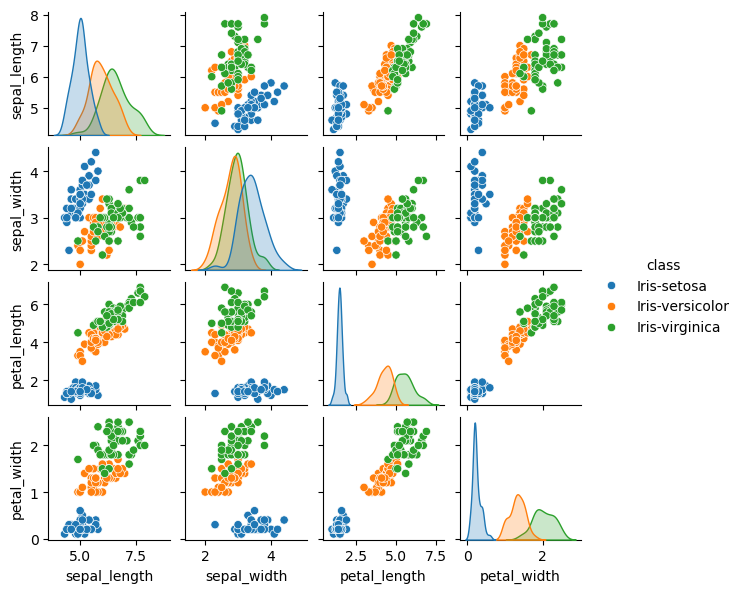

In [27]:
sns.pairplot(data=df, hue='class', height=1.5)

<Axes: ylabel='petal_length'>

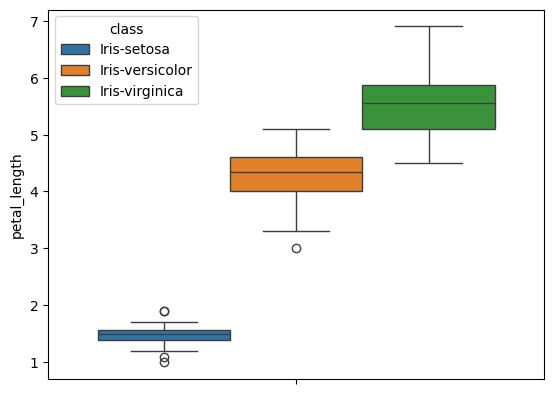

In [28]:
sns.boxplot(data=df, y='petal_length', hue='class')

<Axes: ylabel='petal_length'>

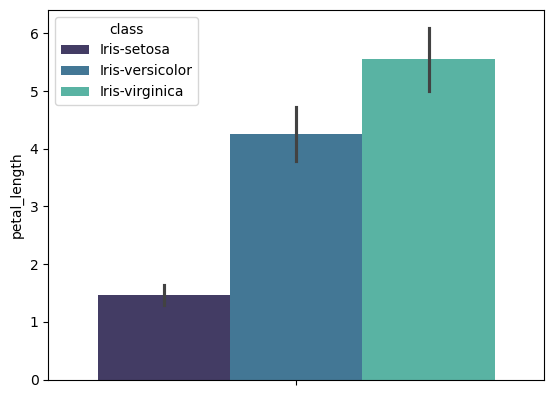

In [32]:
sns.barplot(data=df, y='petal_length', hue='class', errorbar='sd', palette='mako')

### Fase (2): Rodando alguns algoritmos classificadores
* Primeiro, vamos separar em conjuntos de treino e teste (120 para treino e 30 para teste)
* Na sequência, vamos aplicar o k-vizinhos mais próximos e Árvore de decisão

In [33]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier

In [34]:
df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [35]:
X = df.drop(columns='class')
y = df['class']

In [38]:
X.shape, y.shape

((150, 4), (150,))

In [51]:
X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                   test_size=0.2,
                                                   random_state=10,
                                                   stratify=y) # random_state fixa a semente aleatória

In [52]:
X_train.shape, X_test.shape

((120, 4), (30, 4))

In [53]:
X_train.head()

,sepal_length,sepal_width,petal_length,petal_width
123,6.3,2.7,4.9,1.8
92,5.8,2.6,4.0,1.2
60,5.0,2.0,3.5,1.0
11,4.8,3.4,1.6,0.2
121,5.6,2.8,4.9,2.0


In [54]:
y_train.value_counts()

class
Iris-virginica     40
Iris-versicolor    40
Iris-setosa        40
Name: count, dtype: int64

In [55]:
# Vamos usar o knn para classificar as espécies

# Instanciando o método
knn = KNeighborsClassifier(n_neighbors=3)

# Treinamento do modelo
knn.fit(X_train, y_train)

# Analisando a acurácia (desempenho geral do modelo classificador)
knn.score(X_test, y_test)

1.0

In [56]:
# Analisando a acurácia (desempenho geral do modelo classificador) para o conjunto de treino
knn.score(X_train, y_train)

0.95

In [57]:
# Vamos usar a Árvore de decisão para classificar

# Instanciando o método
ad = DecisionTreeClassifier()

# Treinamento do modelo
ad.fit(X_train, y_train)

# Analisando a acurácia
ad.score(X_test, y_test)

0.9666666666666667

In [58]:
# Analisando a acurácia (desempenho geral do modelo classificador) para o conjunto de treino
ad.score(X_train, y_train)

1.0